# ***OVERVIEW***
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we target to complete the analysis of what sorts of people were likely to survive.

https://www.kaggle.com/datasets/brendan45774/test-file

# ***Importing Libraries***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(12, 10)})

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/tested.csv')

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# ***Types of Features:***

*   **Categorical -** Sex, Embarked

*   **Continuous -** Age, Fare
*   **Discrete -** SibSp, Parch


*   **Alphanumeric -** Cabin



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# <font color='green'>***Numerical Value Analysis***</font>

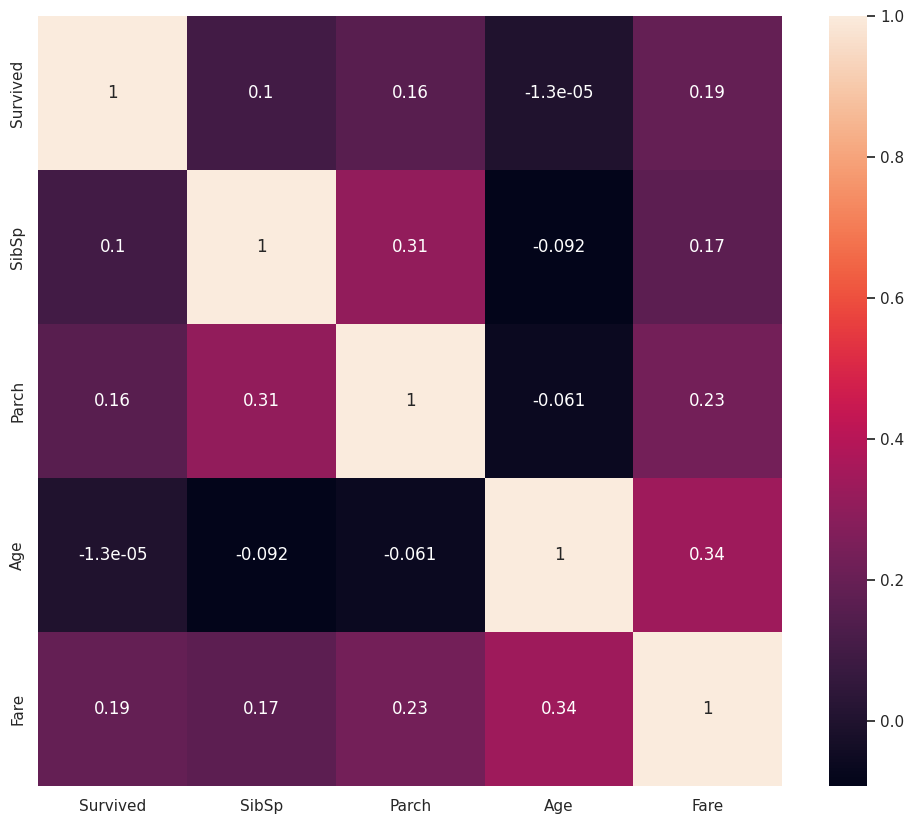

In [ ]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True)

# ***Conclusion :***
Only Fare feature seems to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

# <font color='green'>***SibSp - Number of siblings/spouses aboard the Titanic***</font>

In [ ]:
data['SibSp'].nunique()

7

In [ ]:
data['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

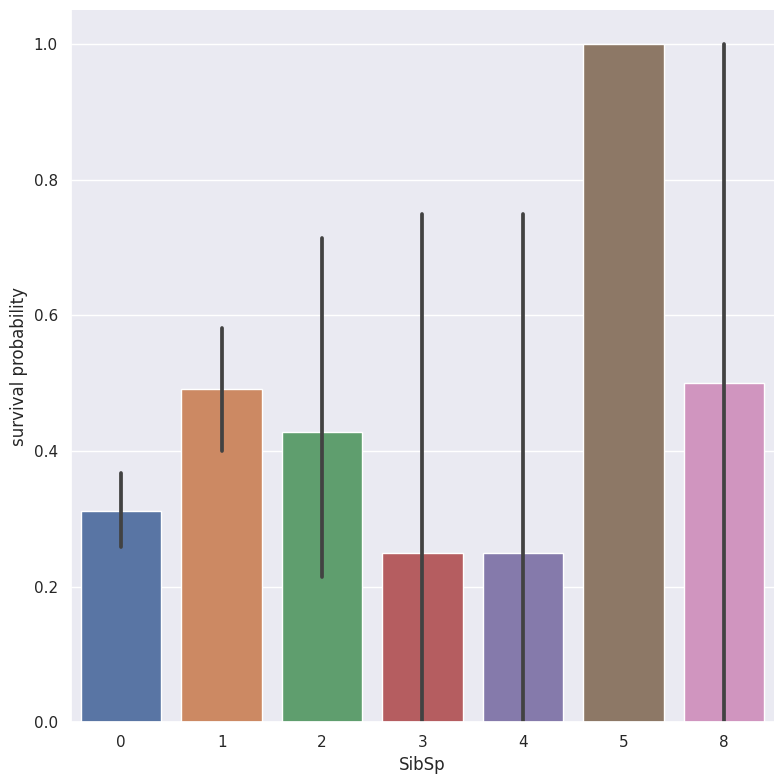

In [ ]:
bargraph_sibsp = sns.catplot(x="SibSp", y="Survived", data=data, kind="bar", height=8)
bargraph_sibsp = bargraph_sibsp.set_ylabels("survival probability")

It seems that passengers having a 2,3 or 4 of siblings/spouses have less chance to survive.


# <font color='green'>***Age***</font>

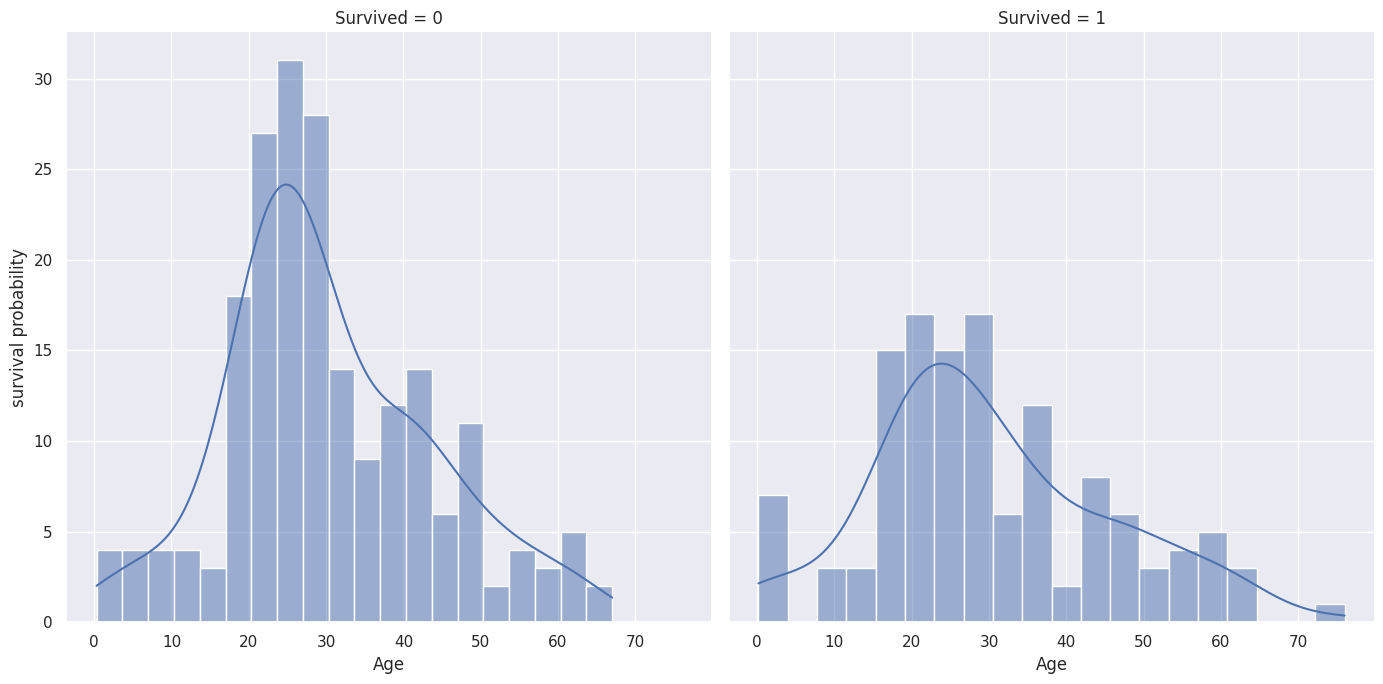

In [ ]:
age_visual = sns.FacetGrid(data, col = 'Survived', height=7)
age_visual = age_visual.map(sns.histplot, "Age", bins=20, kde=True)
age_visual = age_visual.set_ylabels("survival probability")

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers (b/w 20 to 30), that have survived. We also see that passengers between 60-70 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

# <font color='green'>***Sex***</font>

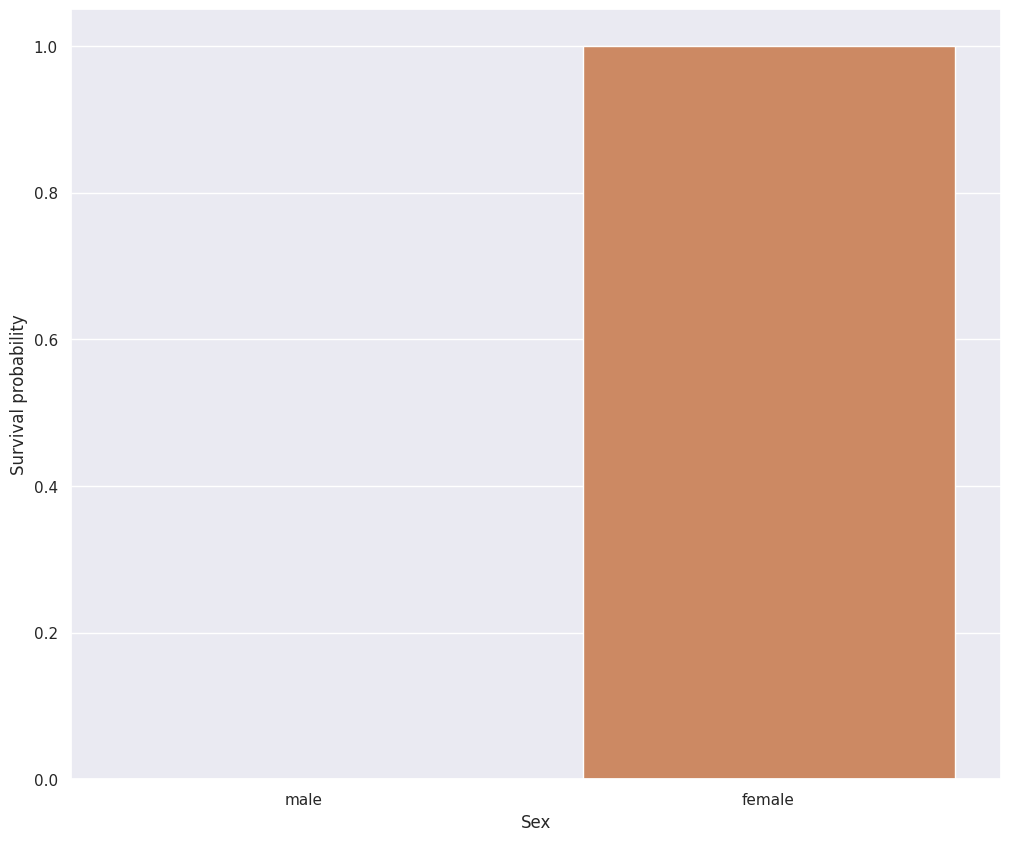

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
age_plot = sns.barplot(x = "Sex",y = "Survived", data = data)
age_plot = age_plot.set_ylabel("Survival probability")

In [ ]:
data[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,1.0
male,0.0


for this give data not a single man survived in this shipwrecks. So Sex, might play an important role in the prediction of the survival. For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation -
 **Women and children first**

# <font color='green'>***PClass***</font>

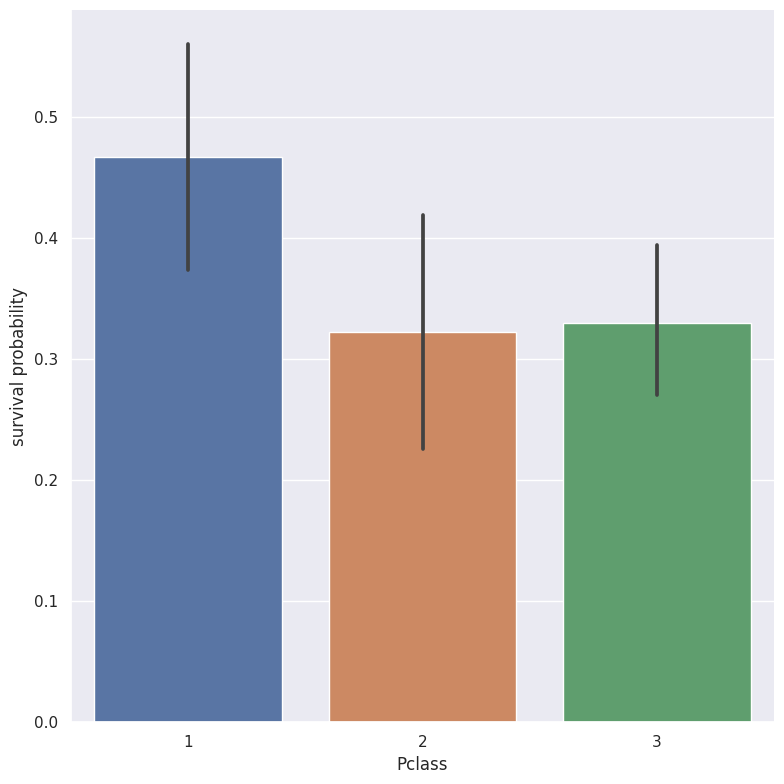

In [ ]:
pclass = sns.catplot(x = "Pclass", y = "Survived", data = data, kind = "bar", height = 8)
pclass = pclass.set_ylabels("survival probability")

# <font color='green'>***PClass vs Survived by Sex***</font>

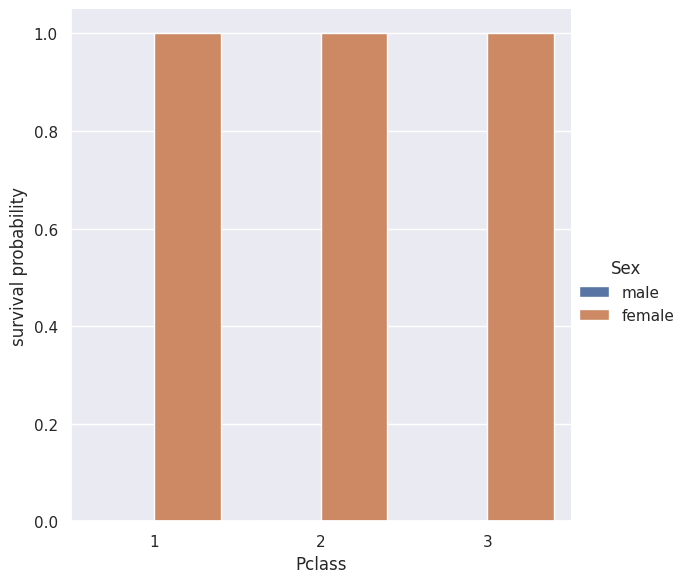

In [ ]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=data, height=6, kind="bar")
g = g.set_ylabels("survival probability")

import warnings
warnings.filterwarnings("ignore")

# <font color='green'>***Embarked***</font>

In [ ]:
data["Embarked"].isnull().sum()

0

In [ ]:
data["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

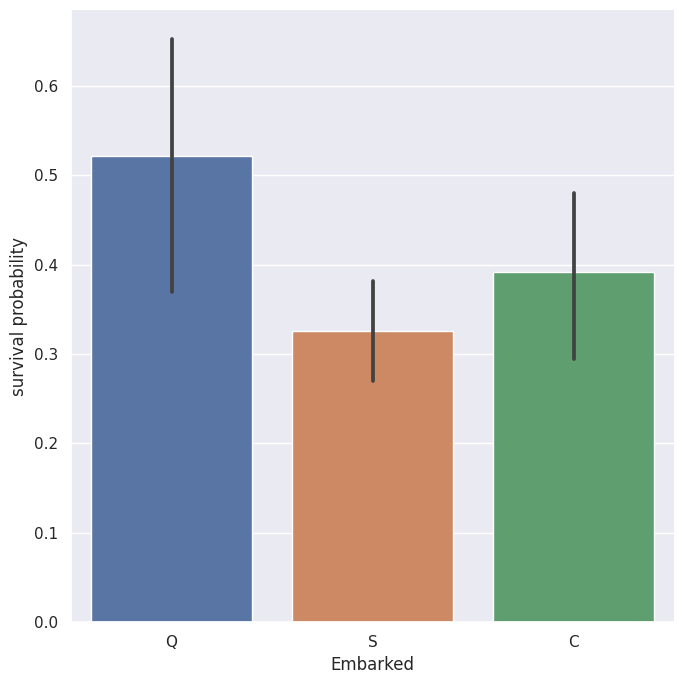

In [ ]:
g = sns.catplot(x="Embarked", y="Survived", data=data, height=7, kind="bar")
g =g.set_ylabels("survival probability")

Passengers coming from Queenstown(Q) have more chance to survive

Let's find the reason

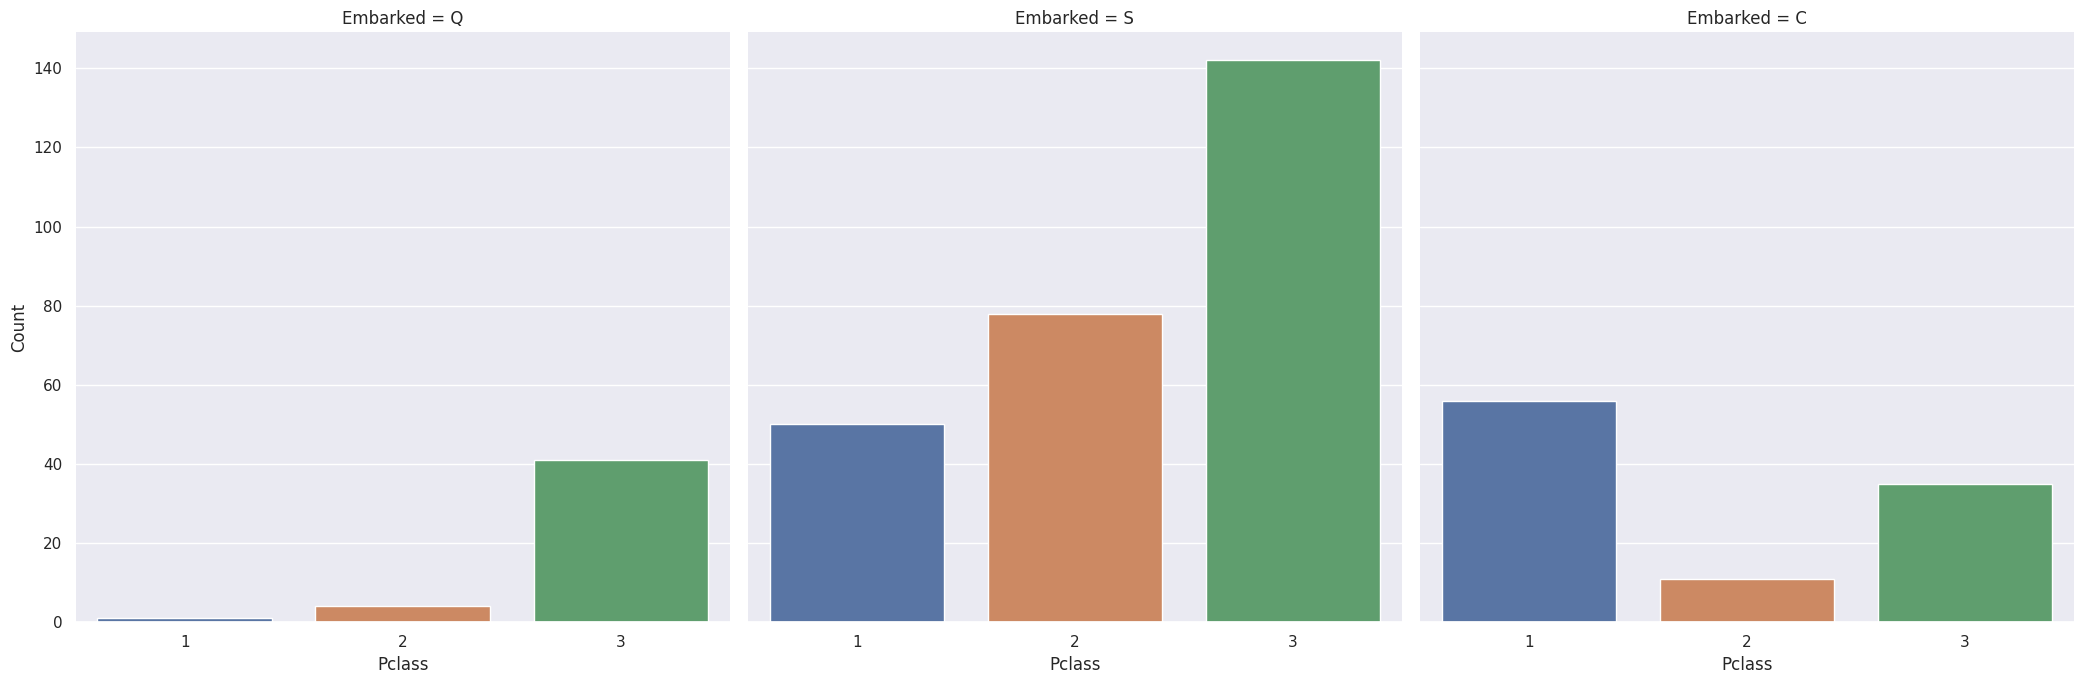

In [ ]:
#explore pclass vs Embarked
g = sns.catplot(x="Pclass", col="Embarked", data=data, height=7, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

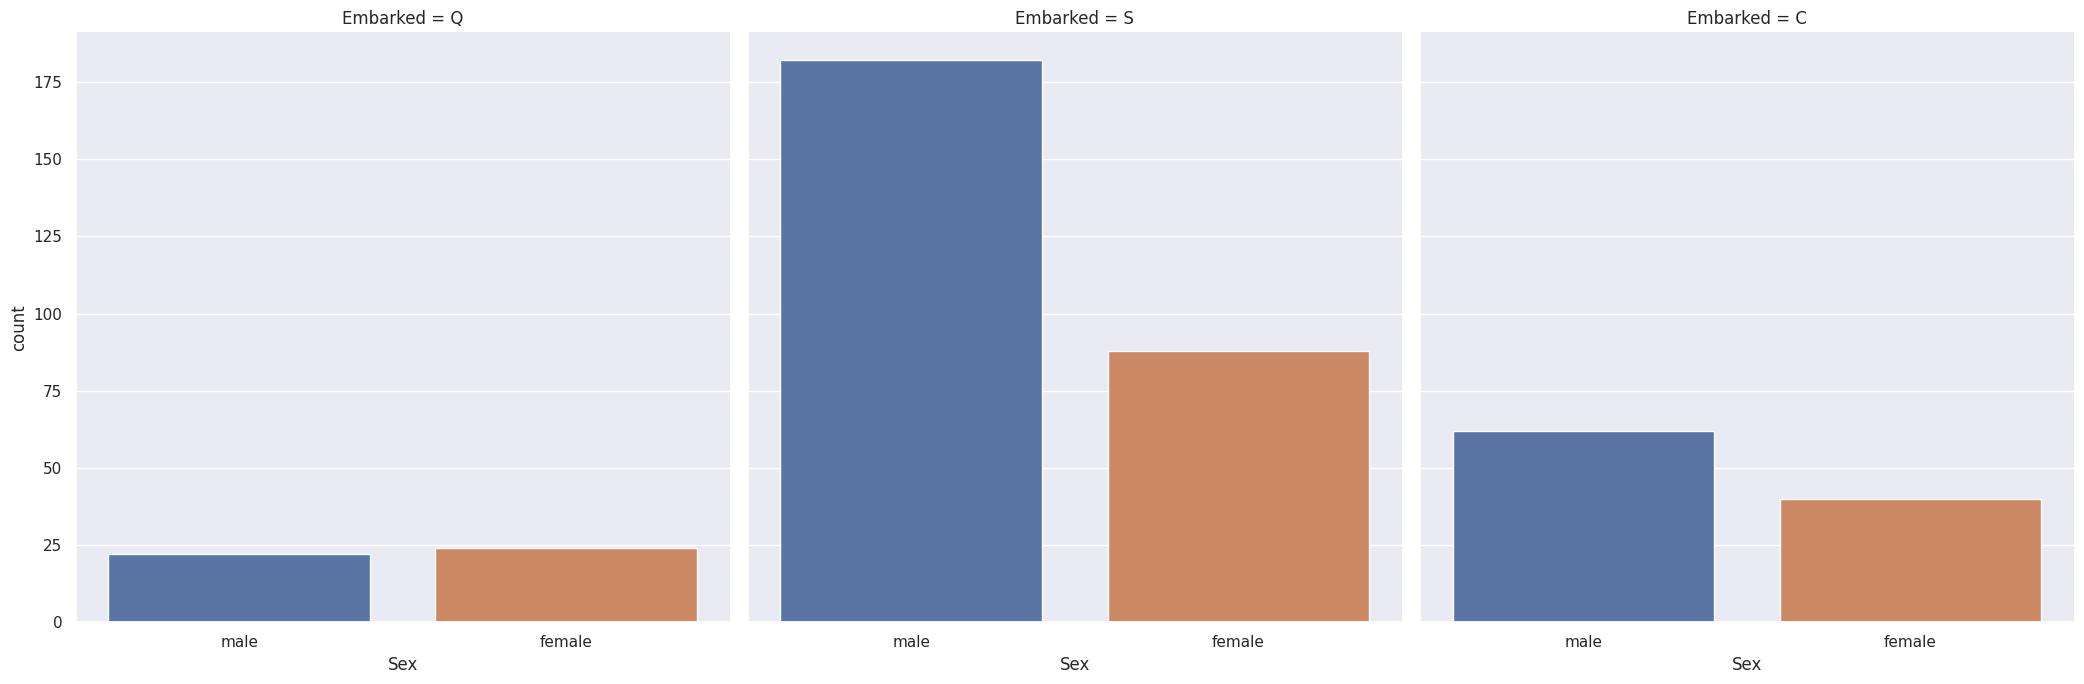

In [ ]:
g = sns.catplot(x="Sex", col="Embarked", data=data, height=7, kind="count")

Queenstown(Q) passengers are mostly in first class which have the highest survival rate.

Southampton (S) and Queenstown (Q) passangers are mostly in third class.